# EDA To Prediction(DieTanic)

https://www.kaggle.com/ash316/eda-to-prediction-dietanic


## Contents of the Notebook:

### Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

### Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.


# Part1: Exploratory Data Analysis(EDA):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/캐글 필사/titanic/titanic/train.csv')

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

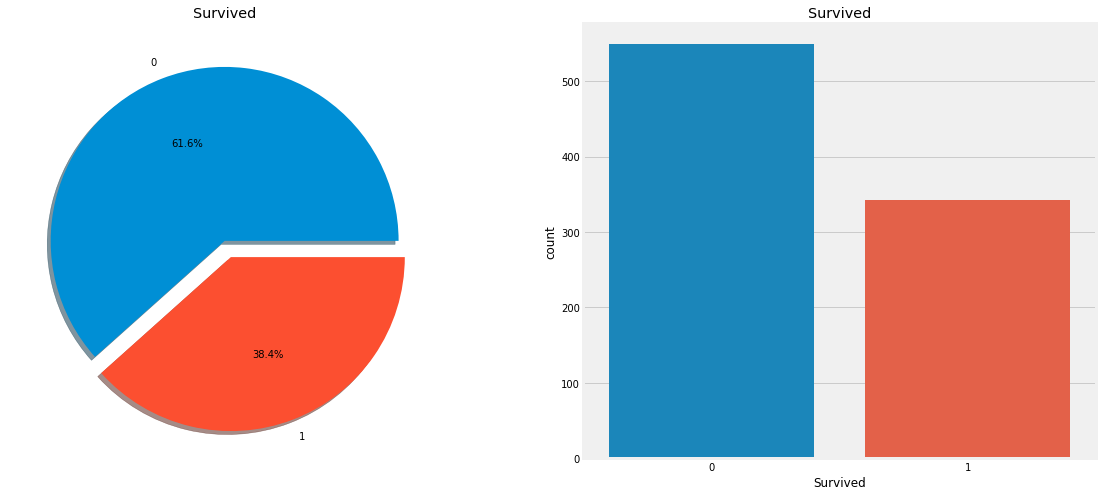

In [5]:
# The Age, Cabin, Embarked have null values

# How many survived??

f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)   # autopct 은 부채꼴 안에 표시될 숫자의 형식을 지정 소수점 두자리까지 표시하도록 설정

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# Types Of Features

## Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

* Categorical Features in the dataset: Sex,Embarked.

## Ordinal Features:

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

* Ordinal Features in the dataset: PClass

## Continous Feature:

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

* Continous Features in the dataset: Age

# Analysing The Features

Sex--> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

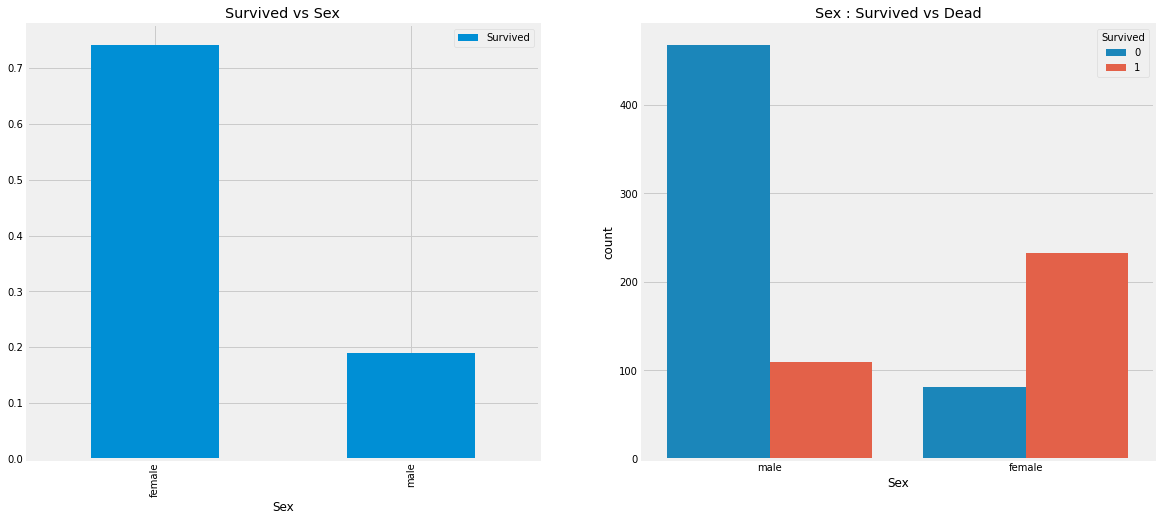

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

Pclass --> Ordinal Feature

In [12]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


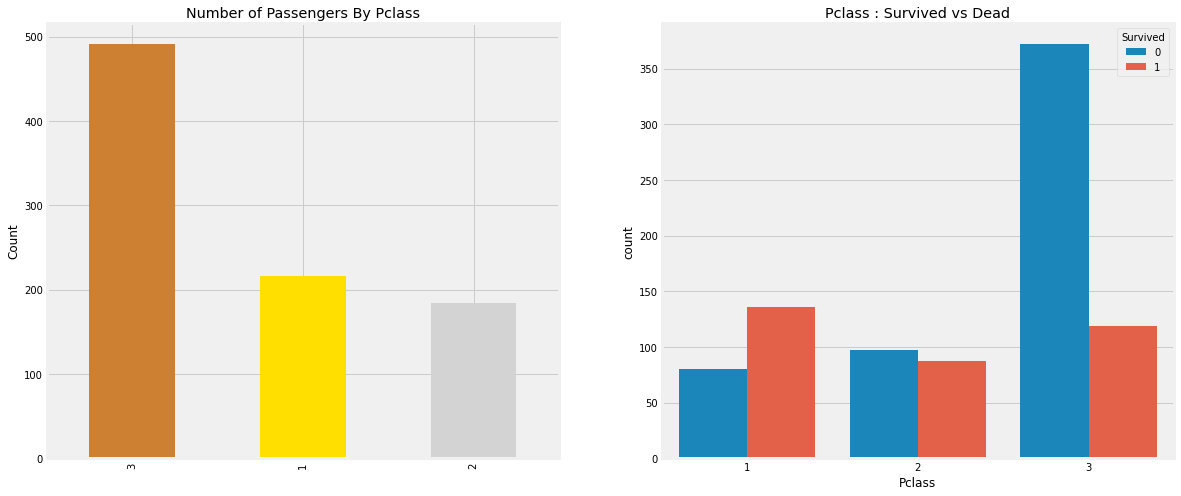

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

In [14]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

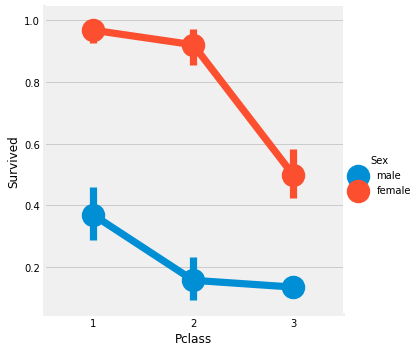

In [21]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Age--> Continous Feature

In [22]:
print('Oldest Passenger was of :', data['Age'].max(), 'Year')
print('Youngest Passenger was of :', data['Age'].min(), 'Year')
print('Average Age on the ship :', data['Age'].mean(), 'Year')

Oldest Passenger was of : 80.0 Year
Youngest Passenger was of : 0.42 Year
Average Age on the ship : 29.69911764705882 Year


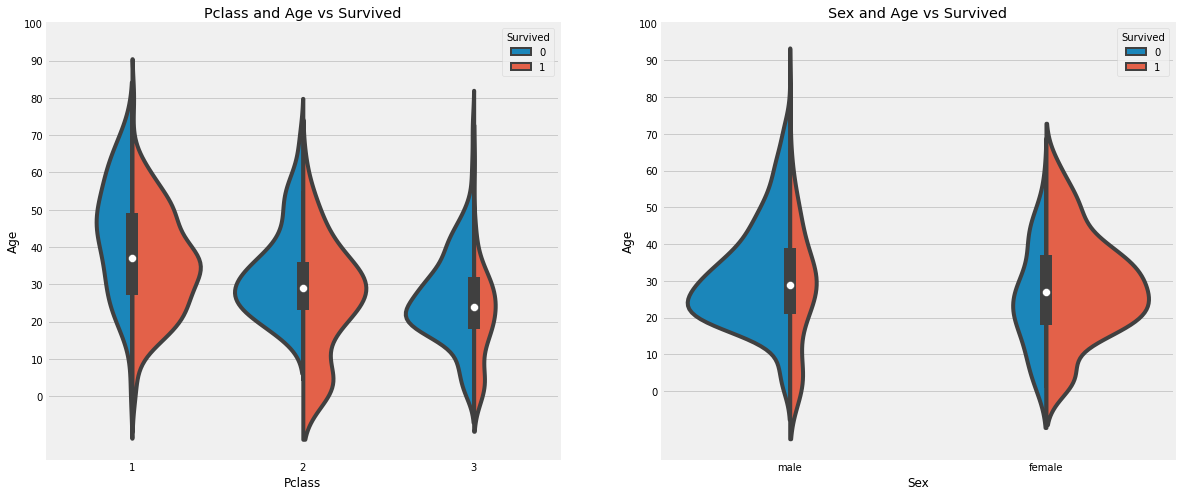

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', scale='count',  data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', scale='count',  data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

''What's In A Name??''---> Feature :p

In [ ]:
data['Initial'] = 0